# Sandra Grace Nelson

### GRIP @ The Sparks Foundation

## Task 6 : Prediction using Decision Tree Algorithm

AIM: To create the Decision Tree classiﬁer and visualize it graphically.

● The purpose is if we feed any new data to this classiﬁer, it would be able to
predict the right class accordingly.

**STEP 1: IMPORTING REQUIRED LIBRARIES**

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns
import pydot
import matplotlib.pyplot as plt

from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

**STEP 2: LOADING THE DATASET**

In [2]:
# Loading Dataset
iris = load_iris()
X=iris.data[:,:] 
y=iris.target

**STEP 3: EXPLORATORY DATA ANALYSIS**

In [3]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

data.head(10)

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
print(data.shape)
print(data.describe())

(150, 5)
       Petal length  Petal Width  Sepal Length  Sepal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


**STEP 4: DATA VISUALIZATION**

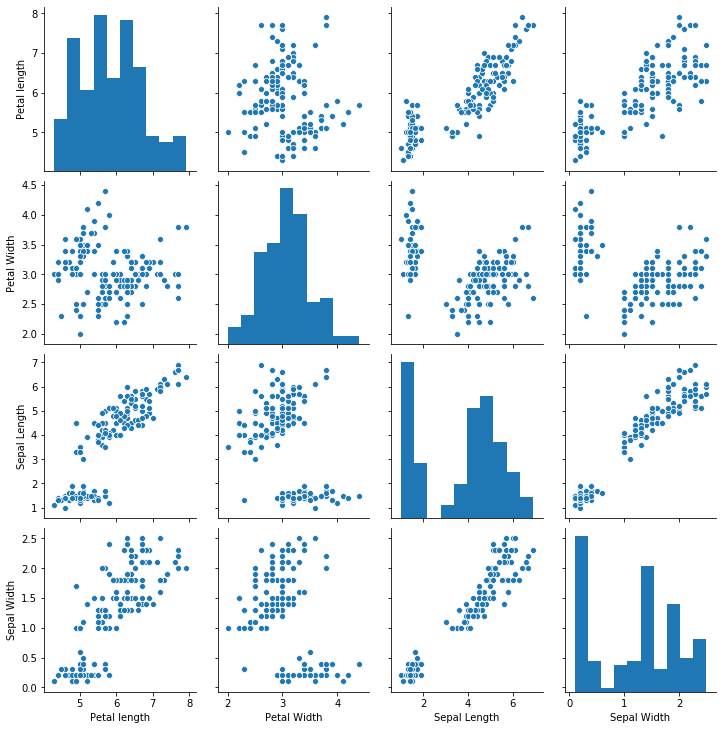

In [5]:
#Comparing various features
sns.pairplot(data)

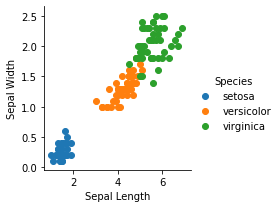

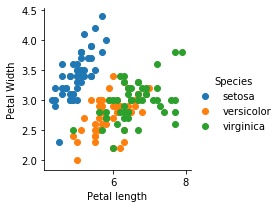

In [6]:
#Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

#Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()

**STEP 5: DECISION TREE MODEL TRAINING**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

**STEP 6: PREDICTION USING TEST DATA**

In [8]:
y_pred = tree_classifier.predict(X_test)

In [9]:
#Comapring actual values and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


**STEP 7: DECISION TREE VISUALIZATION**

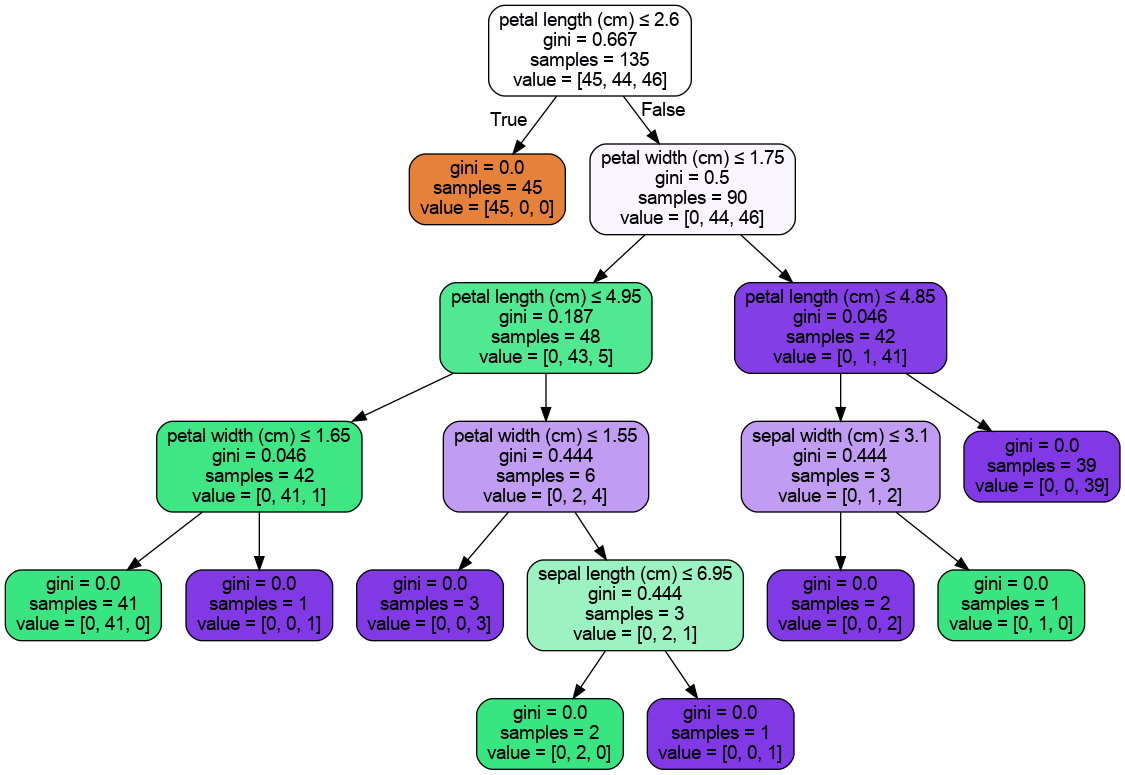

In [10]:
dot_data = StringIO()
export_graphviz(tree_classifier, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**STEP 8: FEEDING NEW DATA AND PREDICTION**

Estimating class of flower whose petals length width are 5.1cm and 3.8cm and sepal length and width are 0.8cm and 1.2cm. 

In [11]:
print('class = ',tree_classifier.predict([[5.1, 3.8, 0.8, 1.2]]))

class =  [0]


Our model predicts the class as 0, that is, setosa.

In [12]:
import sklearn.metrics as sm

Accuracy = sm.accuracy_score(y_test, y_pred)
Accuracy

1.0

Accuracy of the model is 100%, so the prediction is right.